In [5]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [7]:
print(pca.components_.shape)

(50, 10000)


In [8]:
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

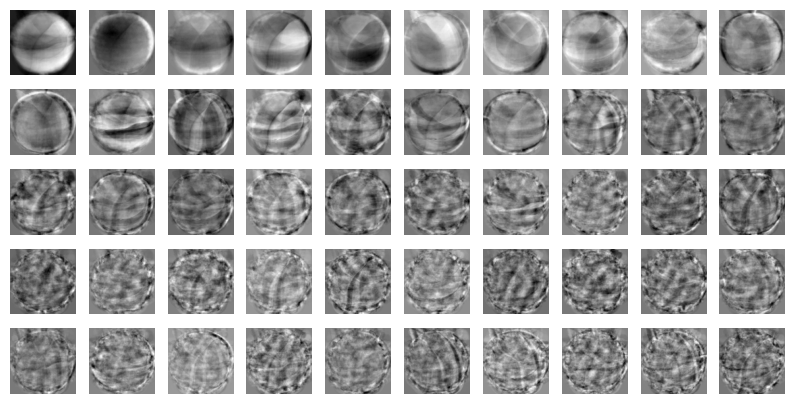

In [9]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [10]:
print(fruits_2d.shape)

(300, 10000)


In [13]:
fruits_pca = pca.transform(fruits_2d) # PCA 변환을 통해서 10000차원의 데이터를 50차원으로 줄임
fruits_pca.shape

(300, 50)

In [14]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

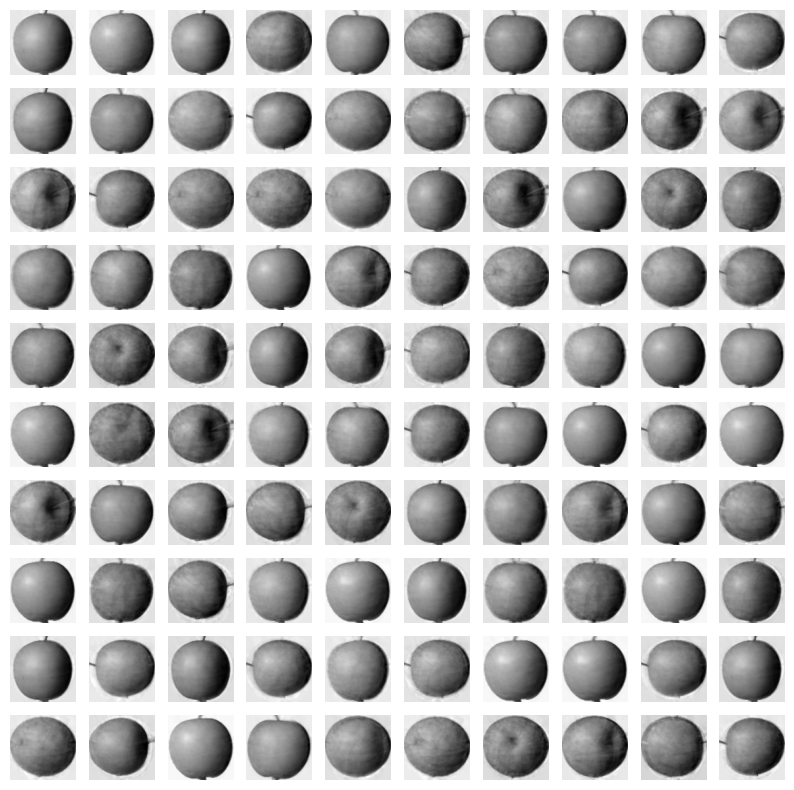

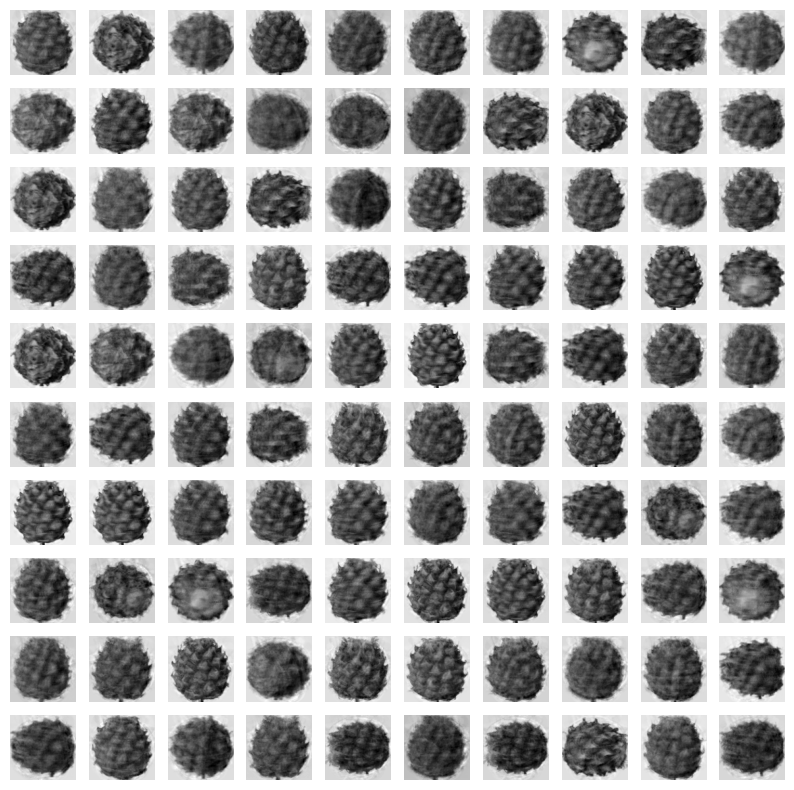

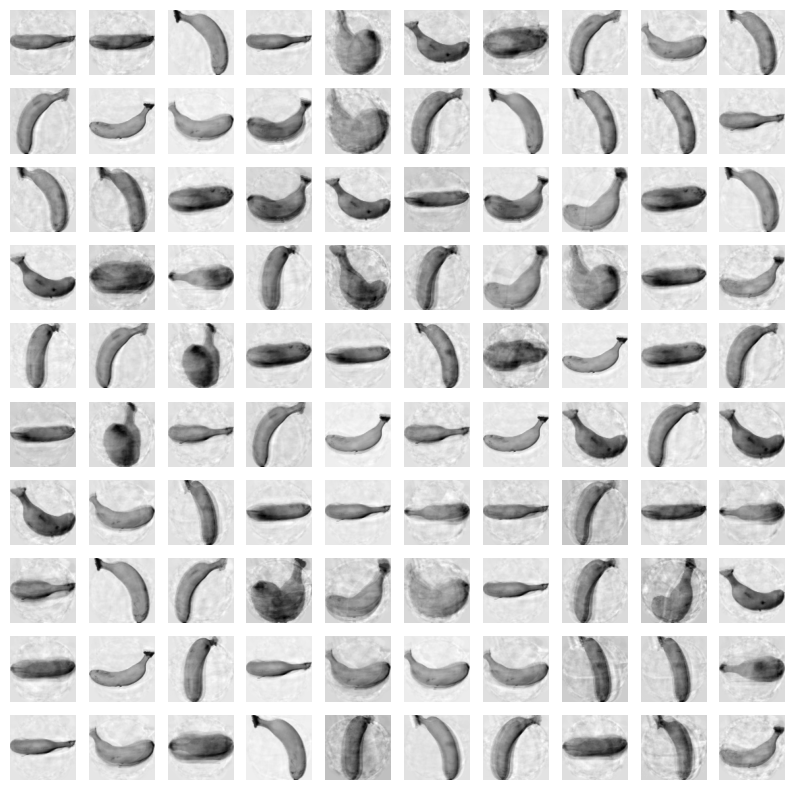

In [15]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])

In [16]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511201, 0.00486382, 0.00480345,
       0.00447833, 0.00437313, 0.00408021, 0.00389476, 0.00372438,
       0.00359276, 0.00331463, 0.0031783 , 0.0030434 , 0.00303677,
       0.0028876 , 0.0027572 , 0.00264815, 0.00255903, 0.00251837,
       0.00247304, 0.00239497, 0.00230932, 0.00221937, 0.00216898,
       0.00213985, 0.00195153, 0.00192517, 0.00189962, 0.00183886,
       0.001798  , 0.00171662, 0.00169169, 0.00162343, 0.00161499])

In [17]:
np.sum(pca.explained_variance_ratio_)

0.9215126862837126

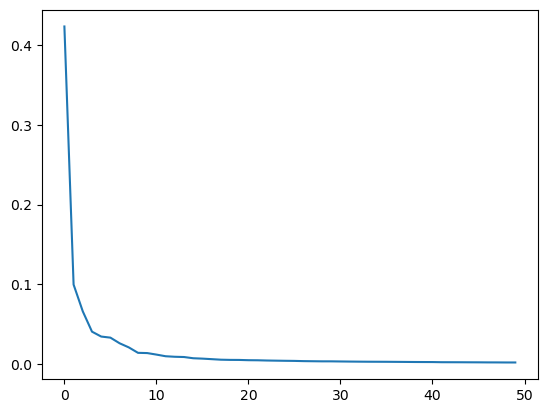

In [19]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [26]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [27]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.3256808280944824


In [28]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.004851722717285156


In [39]:
pca = PCA(n_components=0.8)
pca.fit(fruits_2d)

PCA(n_components=0.8)

In [40]:
print(pca.n_components_)

14


In [41]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 14)

In [42]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.006171369552612304


In [43]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)

In [44]:
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


/Users/hyunjae/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


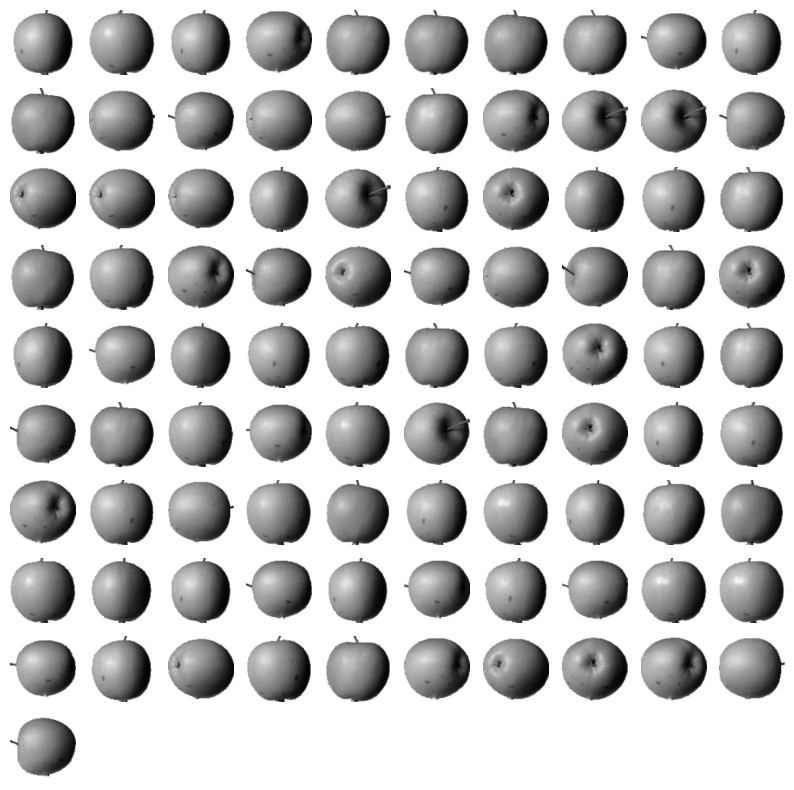

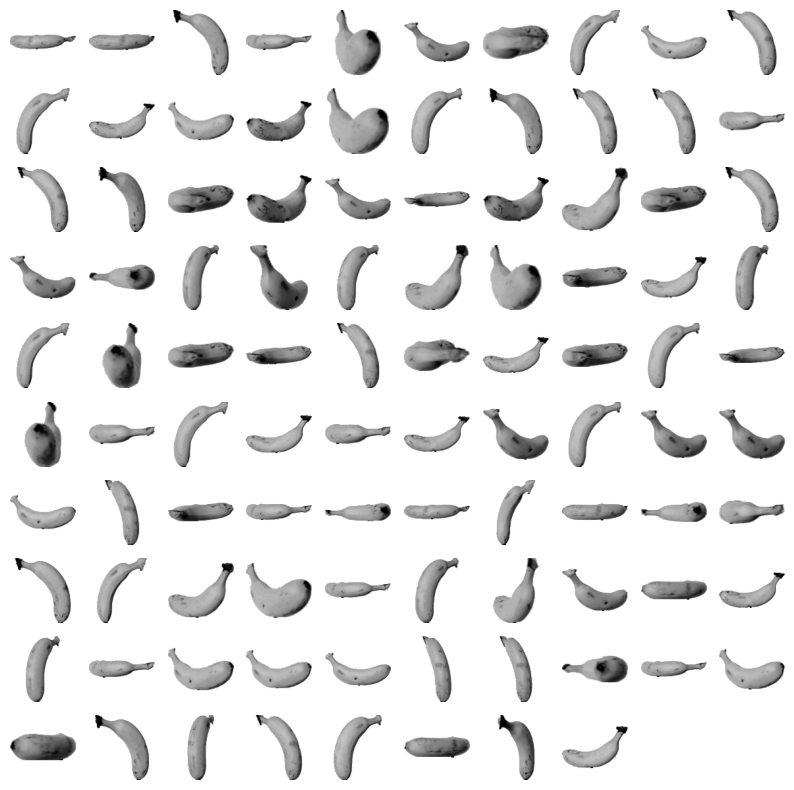

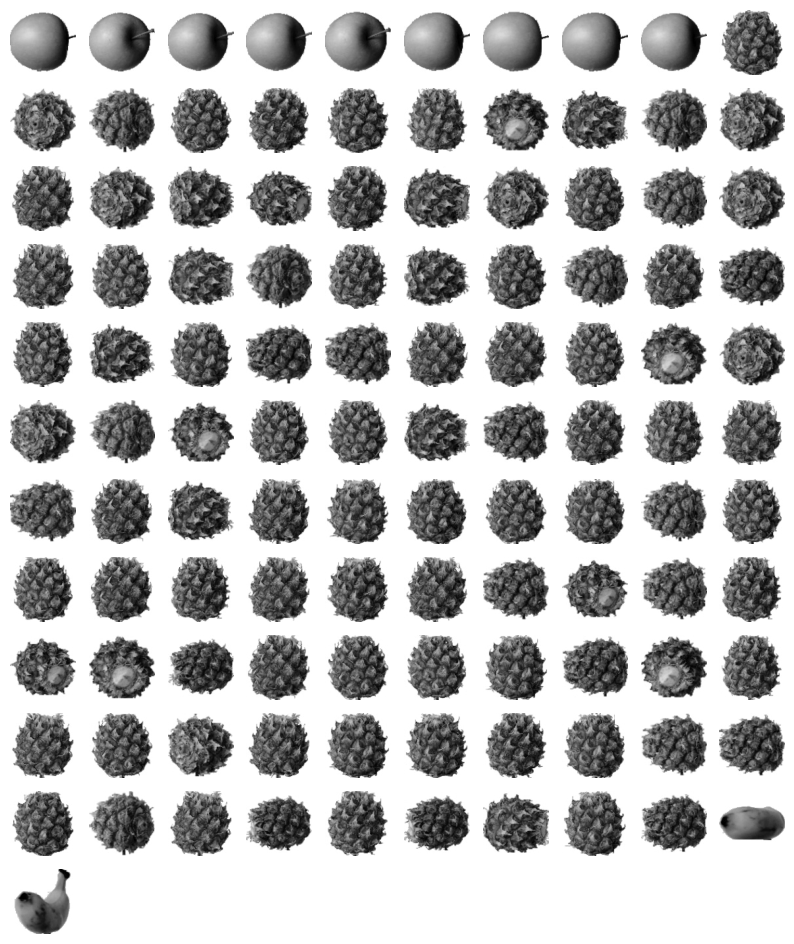

In [45]:
for label in range(3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

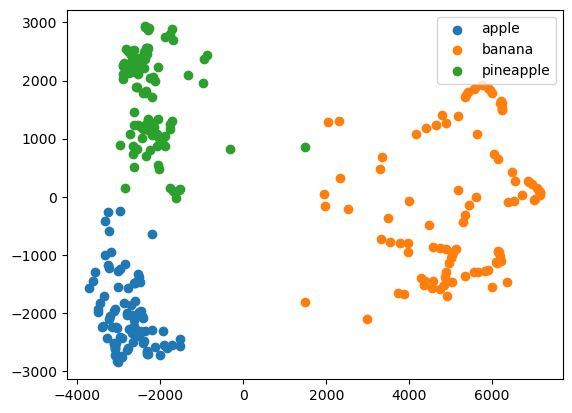

In [46]:
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()